In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# VIDEO: Standard matrix multiplication, parts 1 & 2
---


In [8]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
try:
    print('np.matmul(A,B) works: \n' + str(np.matmul(A,B)))
except:
    print('np.matmul(A,B) does not work \n\n')
try:
    print('np.matmul(A,A) works: \n' + str(np.matmul(A,A)))
except:
    print('np.matmul(A,A) does not work\n')
try:
    print('np.matmul(np.matrix.transpose(A),C) works:\n' +
          str(np.matmul(np.matrix.transpose(A),C)))
except:
    print('np.matmul(np.matrix.transpose(A),C) does not work\n')

try:
    print('np.matmul(B,np.matrix.transpose(B)) works:\n ' +
          str(np.matmul(B,np.matrix.transpose(B))))
except:
    print('np.matmul(B,np.matrix.transpose(B)) does not work\n')
try:
    print('np.matmul(np.matrix.transpose(B),B) works:\n ' + 
          str(np.matmul(np.matrix.transpose(B),B)))
except:
    print('np.matmul(np.matrix.transpose(B),B) does not work\n')
try:
    print('np.matmul(B,C) works:\n' + str(np.matmul(B,C)))
except:
    print('np.matmul(B,C) does not work\n')
try:
    print('np.matmul(C,B) works:\n' + str(np.matmul(C,B)))
except:
    print('np.matmul(C,B) does not work\n')
try:
    print('np.matmul(np.matrix.transpose(C),B) works: \n' +
          str(np.matmul(np.matrix.transpose(C),B)))
except:
    print('np.matmul(np.matrix.transpose(C),B) does not work\n')
try:
    print('np.matmul(C,np.matrix.transpose(B)) works:\n' +
          str(np.matmul(C,np.matrix.transpose(B))))
except:
    print('np.matmul(C,np.matrix.transpose(B)) does not work\n')

np.matmul(A,B) works: 
[[ 1.91718703e+00  8.50201097e-01  2.97430163e+00  1.65346278e+00
  -5.27924579e-01  6.39485147e-01]
 [-1.12372863e+00  7.22122541e-01 -9.82217410e-01 -1.04286922e-03
   5.89358393e+00  4.99314901e+00]
 [-6.62677367e-01 -6.57941724e-01  1.04528900e+00  7.08465246e-01
  -2.12900190e+00 -2.40418784e+00]
 [-3.08598550e+00 -7.02365578e-01  1.55618133e-01  9.54658887e-01
   2.62685929e+00  7.55411861e-01]]
np.matmul(A,A) does not work

np.matmul(np.matrix.transpose(A),C) works:
[[ 1.80415976  1.93243817 -0.53672648 -0.27774316 -1.02742137 -0.44934534]
 [ 2.51311545  0.76246641 -3.70210634 -3.44609095 -2.47207146  2.01102949]
 [ 2.32194986 -0.76424275 -0.60249723  0.62619125 -2.92062535  1.36094232]]
np.matmul(B,np.matrix.transpose(B)) works:
 [[ 2.72401367  1.21396379  0.87383085]
 [ 1.21396379  7.41210786 -0.6703744 ]
 [ 0.87383085 -0.6703744   4.13779546]]
np.matmul(np.matrix.transpose(B),B) works:
 [[ 2.07204761  0.48685439  0.25425882 -0.39072964 -1.79197777 -0.52

In [105]:
# implement matrix multiplication via layers

# generate two matrices (A, B)
m = 4
n = 6

A = np.random.randn(m,n)
B = np.random.randn(n,m)

# Build the product matrix layer wise (for-loop)

c1 = np.zeros((m, m))
for i in range(n):
    c1 += np.outer(A.transpose()[i], B[i])
# Implement the matrix multiplication directly
c2 = np.matmul(A, B)
c1 - c2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [106]:
import pandas as pd
# Have a more familiar investigation of the matrix A
print(pd.DataFrame(A))
# matrix output
A

          0         1         2         3         4         5
0 -1.064429  0.126588  0.544924  0.809064 -0.434494 -0.563182
1 -0.505143  1.028496 -1.152508  0.306393 -2.026081 -1.908187
2 -0.544730 -0.419017  0.880204 -0.767678  0.092038  0.598838
3  0.920344  0.171238 -0.988816 -1.065791  0.485092 -0.161872


array([[-1.06442882,  0.12658817,  0.54492382,  0.8090638 , -0.43449377,
        -0.56318198],
       [-0.50514277,  1.0284959 , -1.15250816,  0.30639309, -2.02608082,
        -1.90818746],
       [-0.54472963, -0.41901727,  0.88020447, -0.76767767,  0.09203754,
         0.59883808],
       [ 0.92034356,  0.1712384 , -0.98881606, -1.06579142,  0.48509232,
        -0.16187172]])


---
# VIDEO: Order-of-operations on matrices
---


In [107]:

n = 2
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = np.matrix.transpose(E) @ np.matrix.transpose(V) @ np.matrix.transpose(I) @ np.matrix.transpose(L)

# test equality by subtracting (ignore possible computer rounding errors)
res1-res2

array([[ 1.04083409e-17,  2.08166817e-17],
       [-3.46944695e-18,  1.38777878e-17]])


---
# VIDEO: Matrix-vector multiplication
---


In [108]:

# number of elements
m = 4

# create matrices
N = np.round( 10*np.random.randn(m,m) )
S = np.round( np.matrix.transpose(N)*N/m**2 ) # scaled symmetric

# and vector
w = np.array([-1, 0, 1, 2])

# with symmetric matrix
# NOTE: The @ symbol for matrix multiplication is relatively new to Python
S@w    # 1
np.matrix.transpose(S@w) # 2
w@S    # 3
np.matrix.transpose(w)@np.matrix.transpose(S)  # 4
np.matrix.transpose(w)@S   # 5


# with nonsymmetric matrix
N@w    # 1
np.matrix.transpose(N@w) # 2
w@N    # 3
np.matrix.transpose(w)@np.matrix.transpose(N)  # 4
np.matrix.transpose(w)@N   # 5


array([14., 10., 13., 16.])

In [116]:
np.matmul(np.array([np.array([2, 4]),
         np.array([2,1])]), np.array([3, 4]))

array([22, 10])


---
# VIDEO: 2D transformation matrices
---


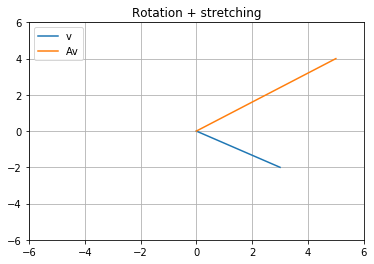

In [26]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [1,-1], [2,1] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

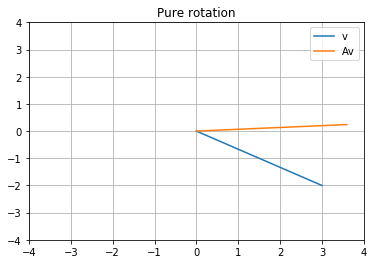

In [34]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
th = 5*np.pi/24
A = np.array([ [math.cos(th),-math.sin(th)], 
              [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()

In [131]:
thetas = np.linspace(0, 2*np.pi, 100)
v = np.array([ 3, -2 ])

In [147]:
vecmags = np.zeros((len(thetas), 2))
for i in range(len(thetas)):
    th = thetas[i]
    A1 = np.array([ [2 * math.cos(th),-math.sin(th)], 
              [math.sin(th),math.cos(th)] ])
    A2 = np.array([ [math.cos(th),-math.sin(th)], 
              [math.sin(th),math.cos(th)] ])
    vecmags[i, 0] = np.linalg.norm(A1 * v)
    
    vecmags[i, 1] = np.linalg.norm(A2 * v)

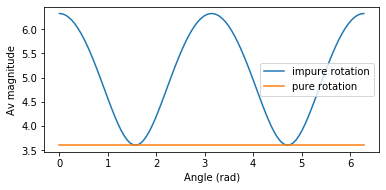

In [205]:
plt.plot(thetas, vecmags)
plt.ylabel('Av magnitude')
plt.xlabel('Angle (rad)')
plt.legend(['impure rotation', 'pure rotation'])

plt.gca().set_aspect('equal', adjustable='box')

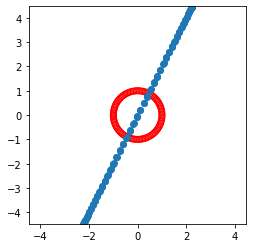

In [207]:
# generate XY coordinates for a circle
x = np.linspace( -np.pi, np.pi, 100)
xy = np.array([np.cos(x), np.sin(x)]).transpose()
# plot the circle

plt.scatter(xy[:,0], xy[:,1],
           facecolors = 'none',
           edgecolors = 'r')

# create a 2x2 matrix (starting with I)

# Try with various matrices
T = np.array([np.array([1, 0]), np.array([0,1])])

T = np.array([np.array([1, 0]), np.array([1,2])])

T = np.array([np.array([1, -5]), np.array([1,2])])

# Try with a singular matrix ( columns form a linearly dependent set)

T = np.array([np.array([1, 2]), np.array([2,4])])

# multiply matrix by coordinates
newxy = np.matmul(xy, T)
# plot the new coords.
plt.scatter(newxy[:,0], newxy[:,1])

maxs = np.max(np.abs([newxy.transpose(), 
                               xy.transpose()]))
axis = np.array([-1, 1, -1, 1]) * maxs
plt.axis(axis)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



---
# VIDEO: Additive and multiplicative matrix identities
---


In [209]:
# size of matrices
n = 4

A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n,n)
Z = np.zeros((n,n))

# test both identities
print(np.array_equal( A@I , A   ))
print(np.array_equal( A   , A@I ))
print(np.array_equal( A   , A+I ))

print(np.array_equal( A   , A+I ))
print(np.array_equal( A+Z , A@I ))


True
True
False
False
True



---
# VIDEO: Additive and multiplicative symmetric matrices
---


In [86]:
## the additive method

# specify sizes
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + np.matrix.transpose(A) )/2

# A symmetric matrix minus its transpose should be all zeros
print( S-np.matrix.transpose(S) )


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [96]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = np.matrix.transpose(A)@A
AAt = A@np.matrix.transpose(A)

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - np.matrix.transpose(AtA) )
print( AAt - np.matrix.transpose(AAt) )



(3, 3)
(5, 5)
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]



---
# VIDEO: Element-wise (Hadamard) multiplication
---


In [100]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C = np.multiply( A,B )

print(C)


[[ -7.66323146e-01  -8.25906929e-02]
 [ -3.90966578e-02   3.55398187e-01]
 [  2.56140438e-01   8.10723166e-02]
 [ -3.34874260e+00  -1.01767138e+00]
 [  1.10493988e+00   1.31099017e-01]
 [ -2.04041307e+00  -1.72216741e+00]
 [ -3.82003034e-02   6.25393221e-01]
 [ -5.75491697e-01   1.34932994e+00]
 [  1.06584279e+00  -6.19962559e-01]
 [ -3.27215150e-01   4.13362140e-02]
 [  1.86198252e-01  -1.57051310e-01]
 [ -1.91929460e-03   2.33527471e-01]
 [ -1.95764360e-01   1.84572276e-01]]


In [228]:
m = 3
A = np.random.randn(m,m)
B = np.random.randn(m,m)

AtA = np.matrix.transpose(A)@A
BtB = np.matrix.transpose(B)@B

Cs = AtA + BtB
Cm = AtA @ BtB
Ch = np.multiply( AtA,BtB )

In [233]:
Cs - Cs.transpose()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [232]:
Cm - Cm.transpose()

array([[ 0.        ,  6.03035914, -3.14100115],
       [-6.03035914,  0.        ,  6.86178245],
       [ 3.14100115, -6.86178245,  0.        ]])

In [231]:
Ch - Ch.transpose()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])


---
# VIDEO: Multiplication of two symmetric matrices
---


In [40]:
# using the sympy library
from sympy import *

a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = symbols('a b c d e f g h k l m n o p q r s t u', real=True)

# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]   ])


# confirmation that A and B are symmetric
print( A - A.transpose() )
print( B - B.transpose() )

# ... and constant diagonal
for i in range(0,np.size(A,0)):
    print( A[i,i] )
for i in range(0,np.size(B,0)):
    print( B[i,i] )


Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
a
a
a
a
l
l
l
l


In [56]:

# but AB neq (AB)'
A@B - (A@B).T

# maybe for a submatrix?
n = 3
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

A1@B1 - (A1*B1).T

Matrix([
[         0,  c*q - e*n, b*q - e*m],
[-c*q + e*n,          0, b*n - c*m],
[-b*q + e*m, -b*n + c*m,         0]])

In [262]:
# Create 2 matrices (4x4), full and diagonal
A = np.random.randn(4, 4)
D = np.diag(np.random.randn(4))

# multiply it by itself, standard and hadamard multiplications
# Dot product
#print(A@A)
#print(A.transpose()@A)
#print(np.matmul(A, A))
#print(np.matmul(A.transpose(), A))

# Element-wise multiplication
print(np.multiply(A, A))
print(np.multiply(A.transpose(), A))

[[2.04058127e+00 6.23115511e-01 3.11513535e-01 1.02274651e+00]
 [4.50714803e-01 7.50028212e-01 1.18102015e+00 4.52726955e-01]
 [1.75969571e-01 6.54767338e-01 1.06077050e-01 2.49096393e+00]
 [2.11587568e-01 1.85055515e+00 6.78407736e-01 1.86498918e-03]]
[[ 2.04058127e+00  5.29950361e-01 -2.34130099e-01 -4.65188615e-01]
 [ 5.29950361e-01  7.50028212e-01  8.79371036e-01  9.15312077e-01]
 [-2.34130099e-01  8.79371036e-01  1.06077050e-01  1.29995738e+00]
 [-4.65188615e-01  9.15312077e-01  1.29995738e+00  1.86498918e-03]]


In [263]:
print(np.multiply(D, D))
print(np.multiply(D.transpose(), D))

[[0.69733106 0.         0.         0.        ]
 [0.         3.24013949 0.         0.        ]
 [0.         0.         0.09634454 0.        ]
 [0.         0.         0.         0.21292941]]
[[0.69733106 0.         0.         0.        ]
 [0.         3.24013949 0.         0.        ]
 [0.         0.         0.09634454 0.        ]
 [0.         0.         0.         0.21292941]]


In [299]:
# Fourier matrix
n = 52
F = np.zeros([n, n], dtype=complex)

In [300]:
F

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])

In [301]:
F[0,0]

0j

In [304]:
#omega
w= np.e ** (-2*np.pi*1j/n)
for j in range(n):
    for k in range(n):
        m = j*k
        F[j, k] = w**m

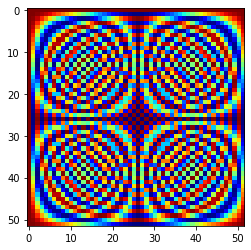

X1 == X2: True


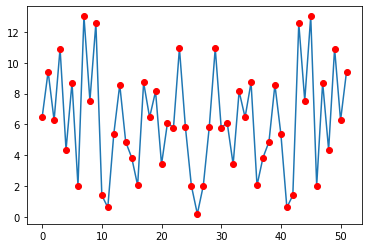

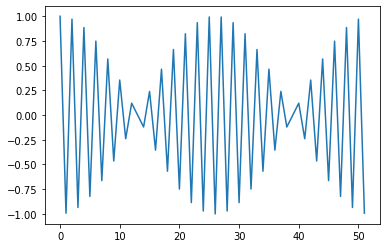

In [306]:
plt.imshow(F.real, cmap='jet')
plt.show()
# plt.imshow(abs(F))
# plt.colorbar()
# plt.show()
      
x = np.random.randn(n)
 
X1 = F@x
X2 = np.fft.fft(x)
print(f'X1 == X2: {np.allclose(X1, X2)}')
 
# plot them
plt.figure()
plt.plot(abs(X1))
plt.plot(abs(X2), marker='o', color='r', linestyle='None')
plt.show()
plt.plot(F.real[:,25])
plt.show()


---
# VIDEO: Frobenius dot-product
---


In [2]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# first vectorize, then vector-dot-product
Av = np.reshape( A,m*n, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,m*n, order='F' )
frob_dp = np.dot( Av,Bv )

# trace method
frob_dp2 = np.trace( np.matrix.transpose(A)@B )
print(frob_dp2)
print(frob_dp)

# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( np.matrix.transpose(A)@A ) )
print(Anorm)
print(Anorm2)

-0.14464283250207544
-0.14464283250207607
6.001639307617599
6.001639307617599


# VIDEO: Matrix norms

In [307]:
# Create a matrix
A = np.array([ [1,2,3], [4,5,6], [7,7,9] ])
# optional orthogonal matrix to show that 2-norm is 1
Q,R = np.linalg.qr(np.random.randn(5,5))
#A = Q

# Frobenius norm
normFrob = np.linalg.norm(A,'fro')

# induced 2-norm
normInd2 = np.linalg.norm(A,2)
# note: computed as below
lamb = np.sqrt( np.max(np.linalg.eig(A.T@A)[0]) )

# schatten p-norm
p = 1
s = np.linalg.svd(A)[1] # get singular values
normSchat = np.sum(s**p)**(1/p)


# % show all norms for comparison
print(normFrob,normInd2,normSchat)

2.2360679774997902 1.0000000000000004 5.0


In [315]:
import pandas as pd
print(pd.DataFrame(Q))
print(pd.DataFrame(R))

          0         1         2         3         4
0 -0.060204  0.909461  0.250422  0.052476 -0.322167
1 -0.341362 -0.391446  0.423920 -0.122857 -0.731738
2 -0.374305 -0.030765 -0.355526  0.841521 -0.156183
3 -0.854645  0.114253 -0.119991 -0.365518  0.329434
4 -0.096566 -0.075171  0.785356  0.374689  0.477335
          0         1         2         3         4
0  1.402519 -0.033157 -0.388917 -0.023870 -2.037418
1  0.000000 -2.156440  1.744826 -0.662794  0.978621
2  0.000000  0.000000  1.297966 -0.707207  0.719037
3  0.000000  0.000000  0.000000 -2.412596 -0.584632
4  0.000000  0.000000  0.000000  0.000000 -1.124213


In [311]:
71/190

0.3736842105263158